# Would anyone like to get a planet from Santa this year?

<img src="img/santa2.jpg" style="display: inline; width: 500px;"/>

# Hi there! My name is Geert Barentsen ([@GeertHub](https://twitter.com/GeertHub))

# I am a scientist at NASA's Ames Research Center in Mountain View

<img src="img/nasa-map.png" style="display: inline;"/>

# At NASA, we love Python for a variety of purposes!

<img src="img/nasa-logo.png" style="width: 180px; display: inline;"/>
<img src="img/heart.png" style="width: 100px; display: inline;"/>
<img src="img/python-logo.png" style="width: 320px; display: inline; margin-left: -80px;"/>

# For example, we use Python to discover planets around distant stars using the [Kepler telescope](https://keplerscience.arc.nasa.gov)

<img src="img/kepler.jpg" style="display:inline; width:620px;">

<img src="img/transit.gif" style="display:inline;">

# Let me show you how you can discover your own planet!

We will use `numpy`, `scipy`, and `matplotlib`.

In [1]:
# First, some basic imports
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [2]:
# Configure the plotting aesthetics (boring)
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

# Let's load some Kepler data (it's all public)

In [3]:
# Read in Kepler data for star number 011904151
import astropy.io.fits
data = astropy.io.fits.open("https://archive.stsci.edu/missions/kepler/target_pixel_files/0119/011904151/kplr011904151-2010009091648_lpd-targ.fits.gz")[1].data
time = data["TIME"][data['QUALITY'] == 0]
images = data["FLUX"][data['QUALITY'] == 0]

# These data give us images of a star at many different timestamps

In [4]:
time[0:5]  # The units are in days

array([ 352.37710511,  352.39753829,  352.47927099,  352.49970417,
        352.52013735])

In [5]:
images[0:5]  # The images give us photons per pixel

array([[[  7.73749619e+01,   3.46947052e+02,   2.20518066e+02,
           3.79315521e+02,   3.80010315e+02,   2.15071472e+02,
           6.53416824e+01],
        [  4.02104721e+01,   1.61733627e+02,   6.00123108e+02,
           4.26371875e+03,   5.84965381e+03,   1.73036218e+03,
           1.15752777e+02],
        [  6.44878922e+01,   1.79528809e+02,   9.81661194e+02,
           1.58747451e+04,   1.03636344e+05,   1.04178857e+04,
           2.48488586e+02],
        [  1.19196304e+02,   8.41078308e+02,   7.62989209e+03,
           5.26318828e+04,   1.65955812e+05,   5.14977734e+04,
           9.95569824e+02],
        [  6.57846069e+01,   2.12042526e+02,   1.02041870e+03,
           1.22960703e+04,   6.86683438e+04,   1.24292881e+04,
           3.10381866e+02],
        [  1.92761345e+01,   8.80226898e+01,   6.80371460e+02,
           7.20903418e+03,   1.98590645e+04,   7.52598340e+03,
           4.91969910e+02],
        [  2.95421028e+01,   4.68371201e+01,   4.16405762e+02,
           3.

In [3]:
# Let's plot the image at the first timestamp
plt.imshow(images[0], cmap='gray', interpolation='nearest');

NameError: name 'plt' is not defined

In [7]:
# In fact we have 9x7-pixel images at 926 different timestamps
images.shape

(926, 9, 7)

# Let's compute the sum of the photons in each image

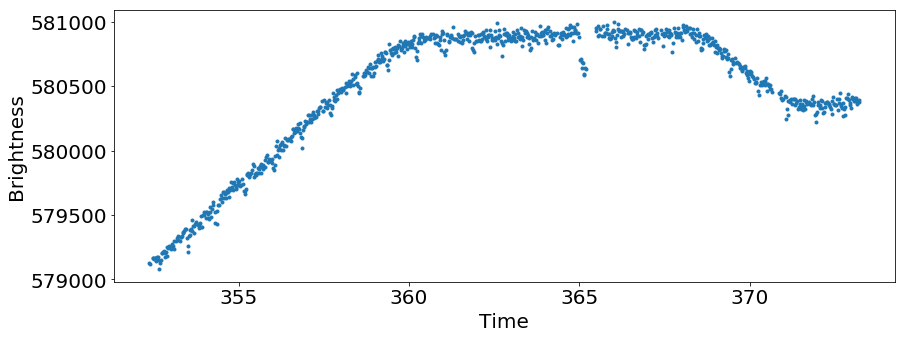

In [8]:
# Let's create a lightcurve by summing the flux in all the time cadences
lightcurve = np.sum(images, axis=(1, 2))

plt.plot(time, lightcurve, '.')
plt.ylabel("Brightness")
plt.xlabel("Time");

# The star shows both short- and long-term trends!

# We don't really care about the long-term trends right now, let's remove it using a low-pass filter:

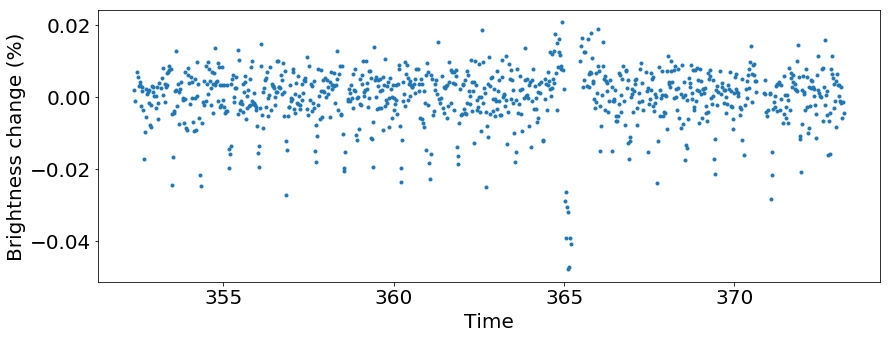

In [9]:
trend = scipy.signal.savgol_filter(lightcurve, 101, polyorder=3) 
percent_change = 100 * ((lightcurve / trend) - 1)

plt.plot(time, percent_change, '.')
plt.ylabel("Brightness change (%)")
plt.xlabel("Time");

# There appears to be a repeating signal in the data!

# Let's identify it using a [periodogram](https://en.wikipedia.org/wiki/Periodogram):

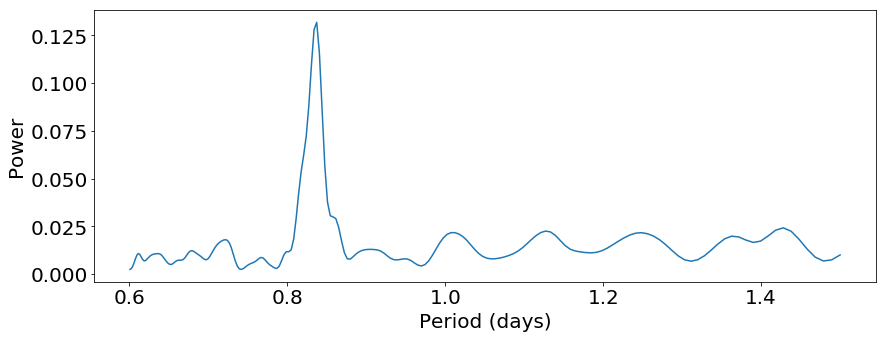

In [10]:
# We will use the Lomb-Scargle Periodogram.
# For background, see Jake VanderPlas' blog at https://jakevdp.github.io/blog/2015/06/13/lomb-scargle-in-python/
from astropy.stats import LombScargle
frequency, power = LombScargle(time, percent_change, nterms=2).autopower(minimum_frequency=1/1.5, maximum_frequency=1/0.6, samples_per_peak=10)
period = 1 / frequency[np.argmax(power)]

plt.plot(1 / frequency, power)
plt.xlabel("Period (days)")
plt.ylabel("Power");

# Something is happening every 0.8 days.

# Let's plot the data in 0.8-day chunks:

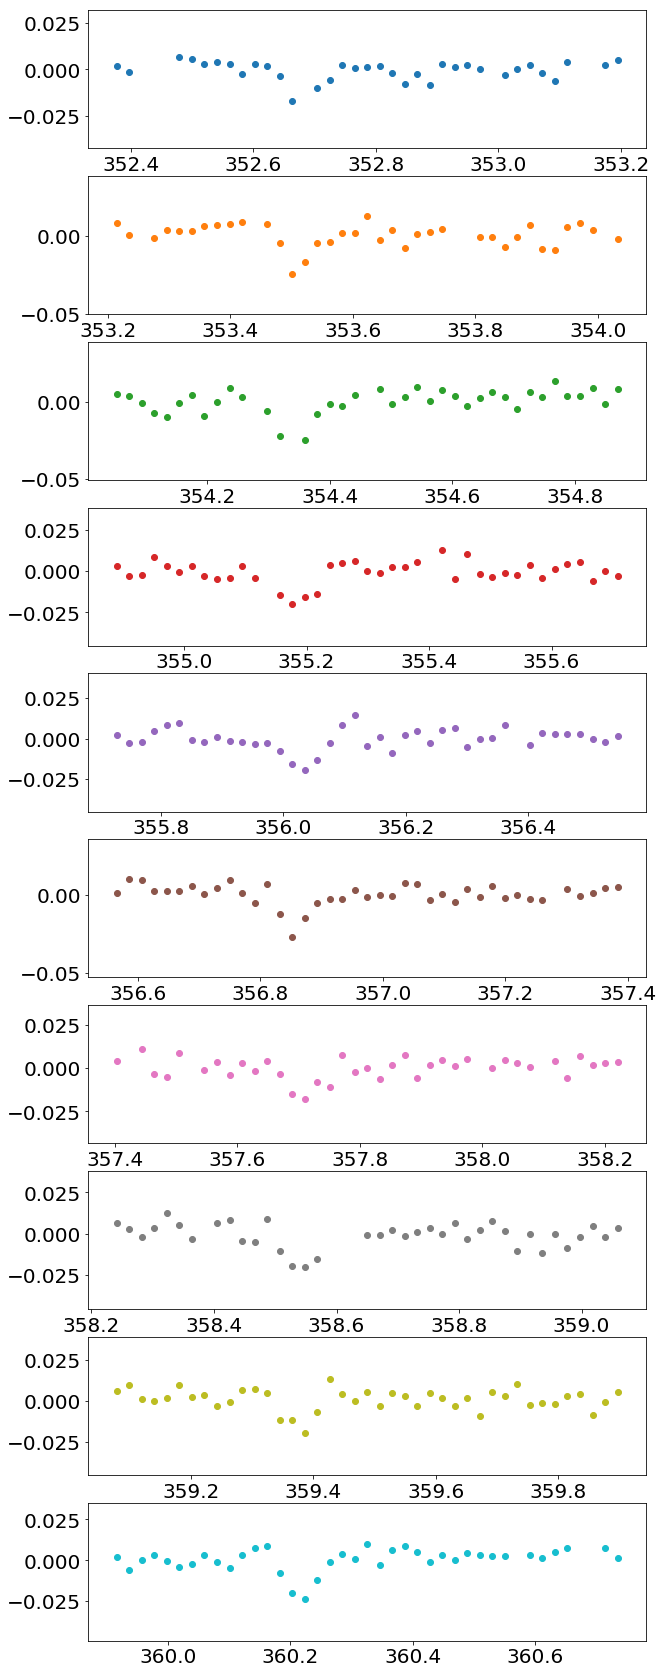

In [11]:
n_plots = 10
plt.figure(figsize=(10, 30))
for i in range(n_plots):
    mask = (time >= time[0] + i*period) & (time < time[0] + (i+1)*period)
    plt.subplot(n_plots, 1, i+1)
    plt.scatter(time[mask], percent_change[mask], c='C{}'.format(i))

# Let's see what it looks like when we combine the above on a single figure:

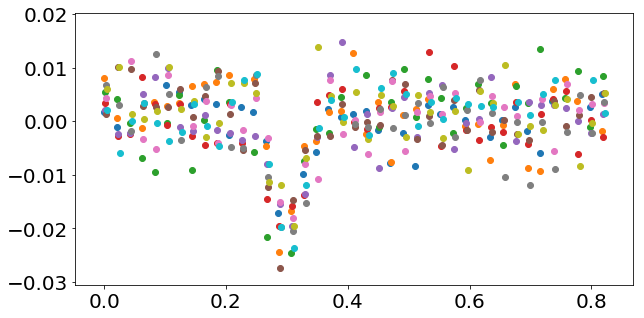

In [12]:
plt.figure(figsize=(10, 5))
for i in range(n_plots):
    mask = (time >= time[0] + i*period) & (time < time[0] + (i+1)*period)
    plt.scatter(time[mask] - time[0] - i*period, percent_change[mask])

# HEY Y'ALL, WE FOUND A PLANET! 🎉
In fact this is a known planet, called [Kepler-10b](https://en.wikipedia.org/wiki/Kepler-10), which orbits a star located 564 light years away in the constellation of Draco.  The planet is too hot to live on -- its surface temperature exceeds 2,000 °F -- however the Kepler telescope keeps finding new and better worlds every week.

(Full disclosure: confirming the details of the planet requires additional work, and it gets complicated once you start digging for the smallest planets, but the same principles apply!)

# All of the above only required a few lines of code:

In [13]:
# Load the data
data = astropy.io.fits.open("https://archive.stsci.edu/missions/kepler/target_pixel_files/0119/011904151/kplr011904151-2010009091648_lpd-targ.fits.gz")[1].data
time = data["TIME"][data['QUALITY'] == 0]
images = data["FLUX"][data['QUALITY'] == 0]

# Remove the long-term trend
trend = scipy.signal.savgol_filter(lightcurve, 101, polyorder=3)
percent_change = 100 * ((np.sum(images, axis=(1, 2)) / trend) - 1)

# Create a periodogram
ls = LombScargle(time, percent_change, nterms=2)
frequency, power = ls.autopower(minimum_frequency=0.9, maximum_frequency=1.7, samples_per_peak=10)
planet_period = 1 / frequency[np.argmax(power)]

# Announce the happy news
print("A planet is orbiting this star every {:.2f} days!".format(planet_period))

A planet is orbiting this star every 0.84 days!


# We are building an open source Python package to help you find planets

Visit [http://pyke.keplerscience.org](http://pyke.keplerscience.org)

<a href="http://pyke.keplerscience.org"><img src="img/pyke-docs.png" style="width:700px; display:inline;"></a>

# Talk to my colleagues at this party to learn more, or join our team as an intern or developer!

<div>
<img src="img/ze.jpg" style="display: inline;">
<img src="img/christina.jpg" style="display: inline;">
<img src="img/gully.jpg" style="display: inline;">
</div>

Twitter:
<a href="https://twitter.com/mircaze">@GeertHub</a>
<a href="https://twitter.com/mircaze">@MircaZe</a>
<a href="https://twitter.com/gully_">@Gully_</a>
<a href="https://twitter.com/TheChedgehog">@TheChedgehog</a>

<small>Created with ❤️ by <a href="https://keplerscience.arc.nasa.gov">NASA's Kepler GO Team</a> for the San Francisco Python Holiday Party on December 7th, 2017.</small>